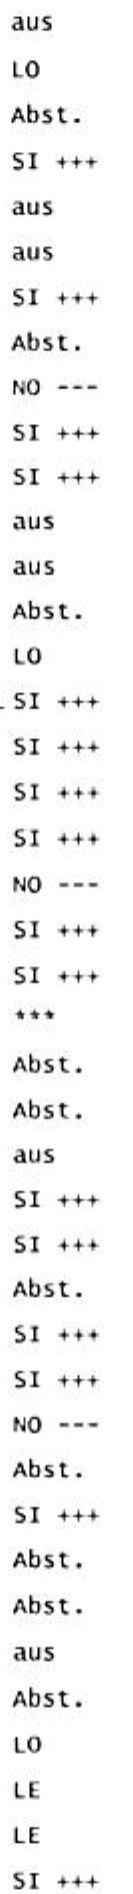

In [2]:
import shutil
import easyocr
import pytesseract
from PIL import Image
from pathlib import Path
from doctr.models import ocr_predictor
from doctr.io import DocumentFile
from paddleocr import PaddleOCR

img_path = './col_voto_1.jpg'

# Cargar imagen
image = Image.open(img_path)
image

In [3]:
# 1️⃣ Tesseract OCR
print("🔹 Tesseract OCR:")
print(pytesseract.image_to_string(image, lang='spa'))
print("-" * 60)

# 2️⃣ EasyOCR
print("🔹 EasyOCR:")
reader = easyocr.Reader(['es'], gpu=False)
for line in reader.readtext(img_path, detail=1):
    text, score = line[1], line[2]
    print(f"Texto: {text} | Confianza: {score:.2f}")
print("-" * 60)

# 3️⃣ docTR
print("🔹 docTR:")
doc = DocumentFile.from_images(img_path)
model = ocr_predictor(pretrained=True)
result = model(doc)
for block in result.pages[0].blocks:
    for line in block.lines:
        text = " ".join([word.value for word in line.words])
        print(f"Línea: {text}")
print("-" * 60)


# 4️⃣ PaddleOCR
ocr = PaddleOCR(
    det_model_dir="models/det/ppocrv3_det_infer",
    rec_model_dir="models/rec/ppocrv3_rec_infer",
    use_angle_cls=True,
    lang="es",
)

result = ocr.ocr(str(img_path), cls=True)  

for line in result[0]:
    text = line[1][0]
    score = line[1][1]
    print(f"Texto: {text} | Confianza: {score:.2f}")

🔹 Tesseract OCR:


[2025-11-04 11:24:27,915] [ WARNING] easyocr.py:71 - Using CPU. Note: This module is much faster with a GPU.


aus

LO
Abst.
SI +++
aus
aus

SI +++
Abst.
NQ. ==
SI +++
SI +++
aus
aus
Abst.
LO

SI +++
SI +++
SI +++
SI ++.
NO ===
SI +++
SI +++

AbSt.
Abst.
aus

SI +++
SI +++
Abst.
SI +++.
SI +++
NO -=--
Abst.
SI +++
Abst.
AbDSt.
aus
AbSt.
LO

LE

BE

SI +44

------------------------------------------------------------
🔹 EasyOCR:
Texto: aus | Confianza: 0.99
Texto: Lo | Confianza: 0.56
Texto: Abst | Confianza: 0.75
Texto: SI | Confianza: 0.98
Texto: aus | Confianza: 0.99
Texto: aus | Confianza: 1.00
Texto: 5I | Confianza: 0.39
Texto: Abs[ | Confianza: 0.67
Texto: Ro | Confianza: 0.61
Texto: SI | Confianza: 0.98
Texto: 5I | Confianza: 0.44
Texto: Jus | Confianza: 0.42
Texto: aus | Confianza: 0.94
Texto: Abst  | Confianza: 0.55
Texto: Lu | Confianza: 0.59
Texto: SI | Confianza: 0.82
Texto: SI | Confianza: 0.91
Texto: SI | Confianza: 0.95
Texto: SI | Confianza: 0.91
Texto: No | Confianza: 0.88
Texto: SI | Confianza: 0.71
Texto: 5I | Confianza: 0.81
Texto: Abst | Confianza: 0.98
Texto: Abst | Confian